In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importação dos dados 
dataset = pd.read_csv('../dados/dadosFirstTime.csv', low_memory=False)

In [3]:
dataset.columns

Index(['País', 'Campeonato', 'timeMandante', 'timeVisitante', 'Posse de bolaM',
       'Posse de bolaV', 'Tentativas de golM', 'Tentativas de golV',
       'FinalizaçõesM', 'FinalizaçõesV', 'Chutes foraM', 'Chutes foraV',
       'Chutes bloqueadosM', 'Chutes bloqueadosV', 'Faltas cobradasM',
       'Faltas cobradasV', 'EscanteiosM', 'EscanteiosV', 'ImpedimentosM',
       'ImpedimentosV', 'Defesas do goleiroM', 'Defesas do goleiroV',
       'FaltasM', 'FaltasV', 'Cartões amarelosM', 'Cartões amarelosV',
       'Cartões VermelhosM', 'Cartões VermelhosV', 'Total de passesM',
       'Total de passesV', 'DesarmesM', 'DesarmesV', 'AtaquesM', 'AtaquesV',
       'Ataques PerigososM', 'Ataques PerigososV', 'OddM', 'OddE', 'OddV',
       'DiferencaGols', 'PlacarPrimeiroTempo', 'PlacarFinal'],
      dtype='object')

In [4]:
dataset.drop(['País', 'Campeonato', 'timeMandante', 'timeVisitante', 'FaltasM', 'FaltasV', 'Chutes bloqueadosM',
             'Chutes bloqueadosV'], axis=1, inplace=True)

In [5]:
X = dataset

In [6]:
##Somente duas classes
X = X.loc[X['PlacarFinal'] != 'E']

In [7]:
X.PlacarFinal.unique()

array(['D', 'V'], dtype=object)

In [8]:
X.isnull().sum().sort_values(ascending=False)

DesarmesV              11233
DesarmesM              11233
Total de passesV       10537
Total de passesM       10537
Ataques PerigososV      9355
Ataques PerigososM      9355
AtaquesV                9355
AtaquesM                9355
Faltas cobradasM        3577
Faltas cobradasV        3577
Posse de bolaM          1713
Posse de bolaV          1713
ImpedimentosV           1438
ImpedimentosM           1438
Chutes foraM            1389
Chutes foraV            1389
EscanteiosV             1386
EscanteiosM             1386
Defesas do goleiroV     1326
Defesas do goleiroM     1326
Tentativas de golV      1322
Tentativas de golM      1322
FinalizaçõesM           1321
FinalizaçõesV           1321
PlacarFinal                0
PlacarPrimeiroTempo        0
Cartões amarelosV          0
Cartões VermelhosM         0
Cartões VermelhosV         0
OddM                       0
OddE                       0
OddV                       0
DiferencaGols              0
Cartões amarelosM          0
dtype: int64

In [9]:
novos_titulos = {
    'DesarmesM' : 'desarmes_mandante',
    'DesarmesV' : 'desarmes_visitante', 
    'Total de passesM' : 'total_passes_mandante',
    'Total de passesV' : 'total_passes_visitante',
    'AtaquesV' : 'ataques_visitante',
    'AtaquesM' : 'ataques_mandante',      
    'Ataques PerigososV' : 'ataques_perigosos_visitante',   
    'Ataques PerigososM' : 'ataques_perigosos_mandante',   
    'Chutes bloqueadosV' : 'chutes_bloqueados_visitante',    
    'Chutes bloqueadosM' : 'chutes_bloqueados_mandante',    
    'Faltas cobradasV' : 'faltas_cobradas_visitante',      
    'Faltas cobradasM': 'faltas_cobradas_mandante',     
    'Posse de bolaM' : 'posse_bola_mandante',       
    'Posse de bolaV' : 'posse_bola_visitante',      
    'ImpedimentosM'  : 'impedimentos_mandante',    
    'ImpedimentosV'  : 'impedimentos_visitante',        
    'Chutes foraV' : 'chutes_fora_visitante',          
    'Chutes foraM' : 'chutes_fora_mandante',         
    'EscanteiosM' : 'escanteios_mandante',           
    'EscanteiosV' : 'escanteios_visitante',            
    'Defesas do goleiroV' : 'defesas_goleiro_visitante',     
    'Defesas do goleiroM' : 'defesas_goleiro_mandante',    
    'Tentativas de golV'  : 'tentativas_gol_visitante',    
    'Tentativas de golM'  : 'tentativas_gol_mandante',    
    'FinalizaçõesV'  : 'finalizacoes_visitante',         
    'FinalizaçõesM'  : 'finalizacoes_mandante',        
    'DiferencaGols'  : 'diferenca_gols_primeiro_tempo',           
    'Cartões amarelosM' : 'cartoes_amarelos_mandante',     
    'Cartões amarelosV' : 'cartoes_amarelos_visitante',        
    'Cartões VermelhosM': 'cartoes_vermelhos_mandante',       
    'Cartões VermelhosV': 'cartoes_vermelhos_visitante',       
    'OddM': 'odd_mandante',                      
    'OddE': 'odd_empate',                     
    'OddV': 'odd_visitante',                      
    'PlacarPrimeiroTempo': 'placar_primeiro_tempo',
}

In [10]:
X = X.rename(columns=novos_titulos)

In [11]:
'''
X.drop(['desarmes_mandante', 'desarmes_visitante', 'total_passes_mandante', 'total_passes_visitante',
       'ataques_mandante', 'ataques_visitante', 'ataques_perigosos_mandante', 'ataques_perigosos_visitante'], axis=1, inplace=True)
    '''

"\nX.drop(['desarmes_mandante', 'desarmes_visitante', 'total_passes_mandante', 'total_passes_visitante',\n       'ataques_mandante', 'ataques_visitante', 'ataques_perigosos_mandante', 'ataques_perigosos_visitante'], axis=1, inplace=True)\n    "

### Tratamento dados nulos

In [12]:
mediana_posse_bola_mandante = X.posse_bola_mandante.median()
mediana_posse_bola_visitante = X.posse_bola_visitante.median()


mediana_tentativas_gol_mandante = X.tentativas_gol_mandante.median()
mediana_tentativas_gol_visitante = X.tentativas_gol_visitante.median()

mediana_finalizacoes_mandante = X.finalizacoes_mandante.median()
mediana_finalizacoes_visitante = X.finalizacoes_visitante.median()

mediana_chutes_fora_mandante = X.chutes_fora_mandante.median()
mediana_chutes_fora_visitante = X.chutes_fora_visitante.median()

mediana_faltas_cobradas_mandante = X.faltas_cobradas_mandante.median()
mediana_faltas_cobradas_visitante = X.faltas_cobradas_visitante.median()

mediana_escanteios_mandante = X.escanteios_mandante.median()
mediana_escanteios_visitante = X.escanteios_visitante.median()

mediana_impedimentos_mandante = X.impedimentos_mandante.median()
mediana_impedimentos_visitante = X.impedimentos_visitante.median()

mediana_defesas_goleiro_mandante = X.defesas_goleiro_mandante.median()
mediana_defesas_goleiro_visitante = X.defesas_goleiro_visitante.median()

########

mediana_desarmes_mandante = X.desarmes_mandante.median()
mediana_desarmes_visitante = X.desarmes_visitante.median()

mediana_total_passes_mandante = X.total_passes_mandante.median()
mediana_total_passes_visitante = X.total_passes_visitante.median()

mediana_ataques_mandante = X.ataques_mandante.median()
mediana_ataques_visitante = X.ataques_visitante.median()

mediana_ataques_perigosos_mandante = X.ataques_perigosos_mandante.median()
mediana_ataques_perigosos_visitante = X.ataques_perigosos_visitante.median()


In [13]:
X.posse_bola_mandante.fillna(mediana_posse_bola_mandante, inplace=True)
X.posse_bola_visitante.fillna(mediana_posse_bola_visitante,inplace=True)

X.tentativas_gol_mandante.fillna(mediana_tentativas_gol_mandante,inplace=True)
X.tentativas_gol_visitante.fillna(mediana_tentativas_gol_visitante,inplace=True)

X.finalizacoes_mandante.fillna(mediana_finalizacoes_mandante,inplace=True)
X.finalizacoes_visitante.fillna(mediana_finalizacoes_visitante,inplace=True)

X.chutes_fora_mandante.fillna(mediana_chutes_fora_mandante,inplace=True)
X.chutes_fora_visitante.fillna(mediana_chutes_fora_visitante,inplace=True)

X.faltas_cobradas_mandante.fillna(mediana_faltas_cobradas_mandante,inplace=True)
X.faltas_cobradas_visitante.fillna(mediana_faltas_cobradas_visitante,inplace=True)

X.escanteios_mandante.fillna(mediana_escanteios_mandante,inplace=True)
X.escanteios_visitante.fillna(mediana_escanteios_visitante,inplace=True)

X.impedimentos_mandante.fillna(mediana_impedimentos_mandante,inplace=True)
X.impedimentos_visitante.fillna(mediana_impedimentos_visitante,inplace=True)

X.defesas_goleiro_mandante.fillna(mediana_defesas_goleiro_mandante,inplace=True)
X.defesas_goleiro_visitante.fillna(mediana_defesas_goleiro_visitante,inplace=True)

########

X.desarmes_mandante.fillna(mediana_desarmes_mandante,inplace=True)
X.desarmes_visitante.fillna(mediana_desarmes_visitante,inplace=True)

X.total_passes_mandante.fillna(mediana_total_passes_mandante,inplace=True)
X.total_passes_visitante.fillna(mediana_total_passes_visitante,inplace=True)

X.ataques_mandante.fillna(mediana_ataques_mandante,inplace=True)
X.ataques_visitante.fillna(mediana_ataques_visitante,inplace=True)

X.ataques_perigosos_mandante.fillna(mediana_ataques_perigosos_mandante,inplace=True)
X.ataques_perigosos_visitante.fillna(mediana_ataques_perigosos_visitante,inplace=True)


In [14]:
#X = X.dropna()

In [15]:
X.isnull().sum().sort_values(ascending=False)

PlacarFinal                      0
faltas_cobradas_mandante         0
defesas_goleiro_mandante         0
impedimentos_visitante           0
impedimentos_mandante            0
escanteios_visitante             0
escanteios_mandante              0
faltas_cobradas_visitante        0
chutes_fora_visitante            0
placar_primeiro_tempo            0
chutes_fora_mandante             0
finalizacoes_visitante           0
finalizacoes_mandante            0
tentativas_gol_visitante         0
tentativas_gol_mandante          0
posse_bola_visitante             0
defesas_goleiro_visitante        0
cartoes_amarelos_mandante        0
cartoes_amarelos_visitante       0
cartoes_vermelhos_mandante       0
cartoes_vermelhos_visitante      0
total_passes_mandante            0
total_passes_visitante           0
desarmes_mandante                0
desarmes_visitante               0
ataques_mandante                 0
ataques_visitante                0
ataques_perigosos_mandante       0
ataques_perigosos_vi

### Tratamento outliers

In [16]:
X.posse_bola_mandante.unique()

array([52., 34., 42., 56., 46., 68., 62., 43., 24., 59., 55., 63., 36.,
       57., 48., 37., 54., 49., 65., 45., 47., 58., 31., 41., 67., 61.,
       50., 53., 51., 66., 64., 38., 39., 40., 44., 60., 70., 35., 76.,
       32., 73., 71., 74., 75., 26., 69., 29., 33., 79., 30.,  0., 28.,
       78., 27., 81., 72., 77., 23., 25., 80., 83., 82., 18., 22., 21.,
       20., 87., 85., 17., 84., 86.])

In [17]:
#quando posse de bola do mandante foi igual a zero, a do visitante também foi
remove_posse =  X.loc[X['posse_bola_mandante'] == 0]
X.drop(remove_posse.index, inplace=True)

In [18]:
X.defesas_goleiro_mandante.unique()

array([ 5.,  1.,  0.,  6.,  3.,  2.,  4.,  7.,  8.,  9., 10., -1.])

In [19]:
#X.loc[X['defesas_goleiro_mandante'] == -1].defesas_goleiro_mandante

In [20]:
#remoção da defesa do goleiro negativa
#X.drop(12208, inplace=True)

In [21]:
X.dtypes

posse_bola_mandante              float64
posse_bola_visitante             float64
tentativas_gol_mandante          float64
tentativas_gol_visitante         float64
finalizacoes_mandante            float64
finalizacoes_visitante           float64
chutes_fora_mandante             float64
chutes_fora_visitante            float64
faltas_cobradas_mandante         float64
faltas_cobradas_visitante        float64
escanteios_mandante              float64
escanteios_visitante             float64
impedimentos_mandante            float64
impedimentos_visitante           float64
defesas_goleiro_mandante         float64
defesas_goleiro_visitante        float64
cartoes_amarelos_mandante          int64
cartoes_amarelos_visitante         int64
cartoes_vermelhos_mandante         int64
cartoes_vermelhos_visitante        int64
total_passes_mandante            float64
total_passes_visitante           float64
desarmes_mandante                float64
desarmes_visitante               float64
ataques_mandante

In [22]:
X['posse_bola'] = 0
X['tentativas_gol'] = 0
X['finalizacoes'] = 0
X['chutes_fora'] = 0
X['faltas_cobradas'] = 0
X['escanteios'] = 0
X['impedimentos'] = 0
X['defesas_goleiro'] = 0
X['cartoes_amarelos'] = 0
X['cartoes_vermelhos'] = 0

X['desarmes'] = 0
X['total_passes'] = 0
X['ataques'] = 0
X['ataques_perigosos'] = 0

for idx, _ in X.iterrows():
        X['posse_bola'].at[idx] = X['posse_bola_mandante'].at[idx] - X['posse_bola_visitante'].at[idx]
        X['tentativas_gol'].at[idx] = X['tentativas_gol_mandante'].at[idx] - X['tentativas_gol_visitante'].at[idx]
        X['finalizacoes'].at[idx] = X['finalizacoes_mandante'].at[idx] - X['finalizacoes_visitante'].at[idx]
        X['chutes_fora'].at[idx] = X['chutes_fora_mandante'].at[idx] - X['chutes_fora_visitante'].at[idx]
        X['faltas_cobradas'].at[idx] = X['faltas_cobradas_mandante'].at[idx] - X['faltas_cobradas_visitante'].at[idx]
        X['escanteios'].at[idx] = X['escanteios_mandante'].at[idx] - X['escanteios_visitante'].at[idx]
        X['impedimentos'].at[idx] = X['impedimentos_mandante'].at[idx] - X['impedimentos_visitante'].at[idx]
        X['defesas_goleiro'].at[idx] = X['defesas_goleiro_mandante'].at[idx] - X['defesas_goleiro_visitante'].at[idx]
        X['cartoes_amarelos'].at[idx] = X['cartoes_amarelos_mandante'].at[idx] - X['cartoes_amarelos_visitante'].at[idx]
        X['cartoes_vermelhos'].at[idx] = X['cartoes_vermelhos_mandante'].at[idx] - X['cartoes_vermelhos_visitante'].at[idx]
        
        X['desarmes'].at[idx] = X['desarmes_mandante'].at[idx] - X['desarmes_visitante'].at[idx]
        X['total_passes'].at[idx] = X['total_passes_mandante'].at[idx] - X['total_passes_visitante'].at[idx]
        X['ataques'].at[idx] = X['ataques_mandante'].at[idx] - X['ataques_visitante'].at[idx]
        X['ataques_perigosos'].at[idx] = X['ataques_perigosos_mandante'].at[idx] - X['ataques_perigosos_visitante'].at[idx]

In [23]:
X.drop(['posse_bola_mandante', 'posse_bola_visitante', 'tentativas_gol_mandante', 'tentativas_gol_visitante',
       'finalizacoes_mandante', 'finalizacoes_visitante', 'chutes_fora_mandante', 'chutes_fora_visitante',
       'faltas_cobradas_mandante', 'faltas_cobradas_visitante', 'escanteios_mandante', 'escanteios_visitante',
       'impedimentos_mandante', 'impedimentos_visitante', 'defesas_goleiro_mandante', 'defesas_goleiro_visitante',
       'cartoes_amarelos_mandante', 'cartoes_amarelos_visitante', 'cartoes_vermelhos_mandante', 'cartoes_vermelhos_visitante',
       'desarmes_mandante', 'desarmes_visitante', 'total_passes_mandante', 'total_passes_visitante', 
        'ataques_mandante', 'ataques_visitante', 'ataques_perigosos_mandante', 'ataques_perigosos_visitante'
       
       ], axis=1, inplace=True)

In [24]:
X

,odd_mandante,odd_empate,odd_visitante,diferenca_gols_primeiro_tempo,placar_primeiro_tempo,PlacarFinal,posse_bola,tentativas_gol,finalizacoes,chutes_fora,faltas_cobradas,escanteios,impedimentos,defesas_goleiro,cartoes_amarelos,cartoes_vermelhos,desarmes,total_passes,ataques,ataques_perigosos
0,3.40,2.25,3.00,0,E,D,4,-3,-2,-1,0,-4,0,2,0,0,-1,21,4,5
1,2.20,2.50,4.50,0,E,V,4,0,-1,1,0,2,0,1,0,0,-1,21,4,5
2,1.80,2.60,7.50,1,V,V,4,4,2,2,0,0,0,-1,1,0,-1,21,4,5
3,3.00,2.20,3.40,0,E,D,4,9,6,3,0,2,0,-6,-1,0,-1,21,4,5
5,3.00,2.25,3.25,0,E,V,4,1,1,0,0,1,0,-1,1,0,-1,21,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19007,3.75,2.30,2.62,-1,D,D,0,-5,-1,-4,3,-4,-1,0,-1,0,-8,21,10,-1
19008,5.00,2.20,2.30,1,V,D,-12,-5,-4,-1,2,-8,1,5,-1,0,3,21,-5,-27
19009,2.60,2.10,4.33,1,V,V,-6,-1,-1,0,-5,-1,0,2,0,0,10,21,-9,-7
19011,4.33,2.10,2.62,0,E,V,-14,1,0,1,-2,3,0,0,-2,0,-2,21,-8,17


### Tratamento variável categórica

In [25]:
X = pd.get_dummies(X, columns=['placar_primeiro_tempo'])

In [26]:
X

,odd_mandante,odd_empate,odd_visitante,diferenca_gols_primeiro_tempo,PlacarFinal,posse_bola,tentativas_gol,finalizacoes,chutes_fora,faltas_cobradas,...,defesas_goleiro,cartoes_amarelos,cartoes_vermelhos,desarmes,total_passes,ataques,ataques_perigosos,placar_primeiro_tempo_D,placar_primeiro_tempo_E,placar_primeiro_tempo_V
0,3.40,2.25,3.00,0,D,4,-3,-2,-1,0,...,2,0,0,-1,21,4,5,0,1,0
1,2.20,2.50,4.50,0,V,4,0,-1,1,0,...,1,0,0,-1,21,4,5,0,1,0
2,1.80,2.60,7.50,1,V,4,4,2,2,0,...,-1,1,0,-1,21,4,5,0,0,1
3,3.00,2.20,3.40,0,D,4,9,6,3,0,...,-6,-1,0,-1,21,4,5,0,1,0
5,3.00,2.25,3.25,0,V,4,1,1,0,0,...,-1,1,0,-1,21,4,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19007,3.75,2.30,2.62,-1,D,0,-5,-1,-4,3,...,0,-1,0,-8,21,10,-1,1,0,0
19008,5.00,2.20,2.30,1,D,-12,-5,-4,-1,2,...,5,-1,0,3,21,-5,-27,0,0,1
19009,2.60,2.10,4.33,1,V,-6,-1,-1,0,-5,...,2,0,0,10,21,-9,-7,0,0,1
19011,4.33,2.10,2.62,0,V,-14,1,0,1,-2,...,0,-2,0,-2,21,-8,17,0,1,0


### Reescala

## Predição

In [27]:
y = X.PlacarFinal
X = X.drop('PlacarFinal', axis=1)

In [28]:
#y = y.map({'D': 0, 'E': 1, 'V': 2})

#### Colunas removidas com base na importância delas

In [29]:
'''
X.drop(['defesas_goleiro_mandante', 'defesas_goleiro_visitante', 'cartoes_vermelhos_mandante', 'cartoes_vermelhos_visitante'], axis=1, inplace=True)

X.drop(['chutes_fora_mandante', 'chutes_fora_visitante', 'impedimentos_mandante', 'impedimentos_visitante',
       ], axis=1, inplace=True)

X.drop(['faltas_cobradas_mandante', 'faltas_cobradas_visitante', 'escanteios_mandante', 'escanteios_visitante',
        'cartoes_amarelos_mandante', 'cartoes_amarelos_visitante'], axis=1, inplace=True)
'''

"\nX.drop(['defesas_goleiro_mandante', 'defesas_goleiro_visitante', 'cartoes_vermelhos_mandante', 'cartoes_vermelhos_visitante'], axis=1, inplace=True)\n\nX.drop(['chutes_fora_mandante', 'chutes_fora_visitante', 'impedimentos_mandante', 'impedimentos_visitante',\n       ], axis=1, inplace=True)\n\nX.drop(['faltas_cobradas_mandante', 'faltas_cobradas_visitante', 'escanteios_mandante', 'escanteios_visitante',\n        'cartoes_amarelos_mandante', 'cartoes_amarelos_visitante'], axis=1, inplace=True)\n"

In [30]:
X

,odd_mandante,odd_empate,odd_visitante,diferenca_gols_primeiro_tempo,posse_bola,tentativas_gol,finalizacoes,chutes_fora,faltas_cobradas,escanteios,...,defesas_goleiro,cartoes_amarelos,cartoes_vermelhos,desarmes,total_passes,ataques,ataques_perigosos,placar_primeiro_tempo_D,placar_primeiro_tempo_E,placar_primeiro_tempo_V
0,3.40,2.25,3.00,0,4,-3,-2,-1,0,-4,...,2,0,0,-1,21,4,5,0,1,0
1,2.20,2.50,4.50,0,4,0,-1,1,0,2,...,1,0,0,-1,21,4,5,0,1,0
2,1.80,2.60,7.50,1,4,4,2,2,0,0,...,-1,1,0,-1,21,4,5,0,0,1
3,3.00,2.20,3.40,0,4,9,6,3,0,2,...,-6,-1,0,-1,21,4,5,0,1,0
5,3.00,2.25,3.25,0,4,1,1,0,0,1,...,-1,1,0,-1,21,4,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19007,3.75,2.30,2.62,-1,0,-5,-1,-4,3,-4,...,0,-1,0,-8,21,10,-1,1,0,0
19008,5.00,2.20,2.30,1,-12,-5,-4,-1,2,-8,...,5,-1,0,3,21,-5,-27,0,0,1
19009,2.60,2.10,4.33,1,-6,-1,-1,0,-5,-1,...,2,0,0,10,21,-9,-7,0,0,1
19011,4.33,2.10,2.62,0,-14,1,0,1,-2,3,...,0,-2,0,-2,21,-8,17,0,1,0


In [31]:

X.drop(['total_passes', 'defesas_goleiro', 'ataques', 'ataques_perigosos', 'cartoes_amarelos',
        'faltas_cobradas', 'tentativas_gol', 'desarmes'
        , 'odd_visitante', 'odd_empate'
       ], axis=1, inplace=True)


### Tratamento classes desbalanceadas

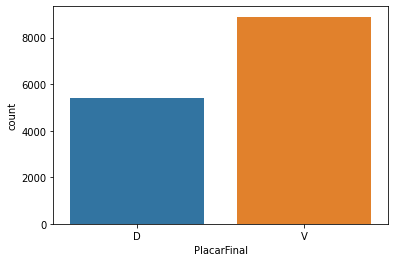

In [32]:
import seaborn as sns
ax = sns.countplot(x=y)

In [33]:
'''
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X, y = nr.fit_sample(X, y)
'''

'\nfrom imblearn.under_sampling import NearMiss\nnr = NearMiss()\nX, y = nr.fit_sample(X, y)\n'

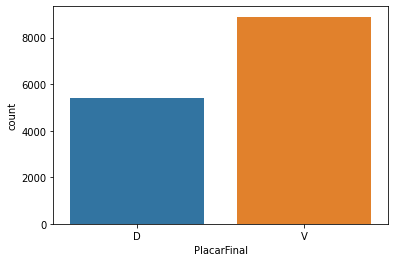

In [34]:
ax = sns.countplot(x=y)

<AxesSubplot:>

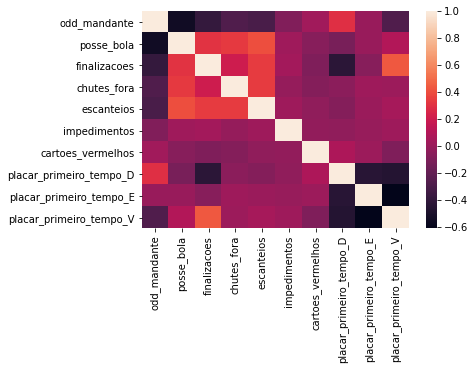

In [35]:
sns.heatmap(X.corr())

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
'''
import pickle as pkl

sc = MinMaxScaler()

X[['posse_bola', 'finalizacoes', 'chutes_fora', 'escanteios',
       'impedimentos', 'cartoes_vermelhos', 'placar_primeiro_tempo_E', 'placar_primeiro_tempo_V', 'odd_mandante',
  'odd_visitante', 'odd_empate']] = sc.fit_transform(X[[
         'posse_bola', 'finalizacoes', 'chutes_fora', 'escanteios',
       'impedimentos', 'cartoes_vermelhos', 'placar_primeiro_tempo_E', 'placar_primeiro_tempo_V',
'odd_mandante',
  'odd_visitante', 'odd_empate']])

with open("sc.pkl", "wb") as outfile:
    pkl.dump(sc, outfile)
    '''

'\nimport pickle as pkl\n\nsc = MinMaxScaler()\n\nX[[\'posse_bola\', \'finalizacoes\', \'chutes_fora\', \'escanteios\',\n       \'impedimentos\', \'cartoes_vermelhos\', \'placar_primeiro_tempo_E\', \'placar_primeiro_tempo_V\', \'odd_mandante\',\n  \'odd_visitante\', \'odd_empate\']] = sc.fit_transform(X[[\n         \'posse_bola\', \'finalizacoes\', \'chutes_fora\', \'escanteios\',\n       \'impedimentos\', \'cartoes_vermelhos\', \'placar_primeiro_tempo_E\', \'placar_primeiro_tempo_V\',\n\'odd_mandante\',\n  \'odd_visitante\', \'odd_empate\']])\n\nwith open("sc.pkl", "wb") as outfile:\n    pkl.dump(sc, outfile)\n    '

In [38]:
X

,odd_mandante,posse_bola,finalizacoes,chutes_fora,escanteios,impedimentos,cartoes_vermelhos,placar_primeiro_tempo_D,placar_primeiro_tempo_E,placar_primeiro_tempo_V
0,3.40,4,-2,-1,-4,0,0,0,1,0
1,2.20,4,-1,1,2,0,0,0,1,0
2,1.80,4,2,2,0,0,0,0,0,1
3,3.00,4,6,3,2,0,0,0,1,0
5,3.00,4,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
19007,3.75,0,-1,-4,-4,-1,0,1,0,0
19008,5.00,-12,-4,-1,-8,1,0,0,0,1
19009,2.60,-6,-1,0,-1,0,0,0,0,1
19011,4.33,-14,0,1,3,0,0,0,1,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [41]:
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_ #Mostra a importância de cada atributo

array([0.16382052, 0.11427058, 0.08184334, 0.07908927, 0.07910842,
       0.07293486, 0.01133368, 0.20702495, 0.048622  , 0.14195239])

In [42]:
X.columns

Index(['odd_mandante', 'posse_bola', 'finalizacoes', 'chutes_fora',
       'escanteios', 'impedimentos', 'cartoes_vermelhos',
       'placar_primeiro_tempo_D', 'placar_primeiro_tempo_E',
       'placar_primeiro_tempo_V'],
      dtype='object')

In [43]:

##MODELOS
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier, 
                              RandomForestClassifier)


In [44]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:

##Classe modelo auxiliar
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
            
    def predict(self,x):
        return self.clf.predict(x)
    def fit(self,x,y):
        return self.clf.fit(x,y)
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    def score(self,x,y):
        return self.clf.score(x,y)

In [46]:
modelos = [{'nome': 'logreg', 'modelo': LogisticRegression},
          {'nome': 'etree', 'modelo': ExtraTreesClassifier},
          {'nome': 'gradboost', 'modelo': GradientBoostingClassifier},
          {'nome': 'adaboost', 'modelo': AdaBoostClassifier},
          {'nome': 'SVC', 'modelo': SVC},
          {'nome': 'KNN', 'modelo': KNeighborsClassifier},
          {'nome': 'GaussianNB', 'modelo': GaussianNB},
          {'nome': 'Perceptron', 'modelo': Perceptron},
          {'nome': 'LinearSVC', 'modelo': LinearSVC},
          {'nome': 'SGD', 'modelo': SGDClassifier},
          {'nome': 'DTree', 'modelo': DecisionTreeClassifier},
          {'nome': 'RForest', 'modelo': RandomForestClassifier}]

In [47]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    #treinar o modelo
    x.fit(X_train, y_train)
    #gerar predição
    x_pred = x.predict(X_test)
    #gerar score
    acuracia = round(x.score(X_test, y_test)*100, 2)
    
    resultados.append({
        'nome': model['nome'],
        'score': acuracia,
        'pred': x_pred
    })


/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/heuller/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [48]:
models = pd.DataFrame(resultados)

In [49]:
models[['nome', 'score']].sort_values(by='score', ascending=False)

,nome,score
6,GaussianNB,82.58
2,gradboost,82.13
0,logreg,82.09
3,adaboost,81.95
11,RForest,81.92
8,LinearSVC,81.43
1,etree,81.26
4,SVC,80.91
7,Perceptron,79.09
9,SGD,78.50


In [76]:
dataset = pd.read_csv('../dados/18do12/bochumeheidenheim.csv', low_memory=False)

In [77]:
dataset

,odd_mandante,odd_empate,odd_visitante,posse_bolaM,posse_bolaV,finalizacoesM,finalizacoesV,chutes_foraM,chutes_foraV,escanteiosM,escanteiosV,impedimentosM,impedimentosV,cartoes_vermelhosM,cartoes_vermelhosV,placar_atual
0,1.05,12.0,34.0,64,36,4,1,0,1,2,2,1,2,0,0,V


In [78]:
dataset['posse_bola'] = 0
dataset['finalizacoes'] = 0
dataset['chutes_fora'] = 0
dataset['escanteios'] = 0
dataset['impedimentos'] = 0
dataset['cartoes_vermelhos'] = 0

for idx, _ in dataset.iterrows():
        dataset['posse_bola'].at[idx] = dataset['posse_bolaM'].at[idx] - dataset['posse_bolaV'].at[idx]
        dataset['finalizacoes'].at[idx] = dataset['finalizacoesM'].at[idx] - dataset['finalizacoesV'].at[idx]
        dataset['chutes_fora'].at[idx] = dataset['chutes_foraM'].at[idx] - dataset['chutes_foraV'].at[idx]
        dataset['escanteios'].at[idx] = dataset['escanteiosM'].at[idx] - dataset['escanteiosV'].at[idx]
        dataset['impedimentos'].at[idx] = dataset['impedimentosM'].at[idx] - dataset['impedimentosV'].at[idx]
        dataset['cartoes_vermelhos'].at[idx] = dataset['cartoes_vermelhosM'].at[idx] - dataset['cartoes_vermelhosV'].at[idx]
        
    

dataset.drop(['posse_bolaM', 'posse_bolaV', 'finalizacoesM', 'finalizacoesV', 'chutes_foraM', 'chutes_foraV',
        'escanteiosM', 'escanteiosV', 'impedimentosM', 'impedimentosV', 'cartoes_vermelhosM', 'cartoes_vermelhosV'], 
       axis=1, inplace=True)

In [79]:
dataset

,odd_mandante,odd_empate,odd_visitante,placar_atual,posse_bola,finalizacoes,chutes_fora,escanteios,impedimentos,cartoes_vermelhos
0,1.05,12.0,34.0,V,28,3,-1,0,-1,0


In [80]:
novos_titulos = {
    'placar_atual' : 'placar_primeiro_tempo'}

In [81]:
dataset = dataset.rename(columns=novos_titulos)

In [82]:
dataset['placar_primeiro_tempo_V'] = 0
dataset['placar_primeiro_tempo_E'] = 0
dataset['placar_primeiro_tempo_D'] = 0

for idx, _ in dataset.iterrows():
    if(dataset['placar_primeiro_tempo'].at[idx] == 'V'):
        dataset['placar_primeiro_tempo_V'].at[idx] = 1
        dataset['placar_primeiro_tempo_E'].at[idx] = 0
        dataset['placar_primeiro_tempo_D'].at[idx] = 0
    elif(dataset['placar_primeiro_tempo'].at[idx] == 'E'):
        dataset['placar_primeiro_tempo_V'].at[idx] = 0
        dataset['placar_primeiro_tempo_E'].at[idx] = 1
        dataset['placar_primeiro_tempo_D'].at[idx] = 0
    else:
        dataset['placar_primeiro_tempo_V'].at[idx] = 0
        dataset['placar_primeiro_tempo_E'].at[idx] = 0
        dataset['placar_primeiro_tempo_D'].at[idx] = 1
        
dataset.drop(['placar_primeiro_tempo'], 
       axis=1, inplace=True)


dataset.drop(['odd_visitante', 'odd_empate'
       ], axis=1, inplace=True)   

In [83]:
X

,odd_mandante,posse_bola,finalizacoes,chutes_fora,escanteios,impedimentos,cartoes_vermelhos,placar_primeiro_tempo_D,placar_primeiro_tempo_E,placar_primeiro_tempo_V
0,3.40,4,-2,-1,-4,0,0,0,1,0
1,2.20,4,-1,1,2,0,0,0,1,0
2,1.80,4,2,2,0,0,0,0,0,1
3,3.00,4,6,3,2,0,0,0,1,0
5,3.00,4,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
19007,3.75,0,-1,-4,-4,-1,0,1,0,0
19008,5.00,-12,-4,-1,-8,1,0,0,0,1
19009,2.60,-6,-1,0,-1,0,0,0,0,1
19011,4.33,-14,0,1,3,0,0,0,1,0


In [84]:
dataset

,odd_mandante,posse_bola,finalizacoes,chutes_fora,escanteios,impedimentos,cartoes_vermelhos,placar_primeiro_tempo_V,placar_primeiro_tempo_E,placar_primeiro_tempo_D
0,1.05,28,3,-1,0,-1,0,1,0,0


In [85]:
'''
with open("sc.pkl", "rb") as infile:
    sc = pkl.load(infile)
    dataset = sc.transform(dataset)
'''
'''
dataset[['posse_bola', 'finalizacoes', 'chutes_fora', 'escanteios',
       'impedimentos', 'cartoes_vermelhos']] = sc.fit_transform(dataset[['posse_bola', 'finalizacoes', 'chutes_fora', 'escanteios',
       'impedimentos', 'cartoes_vermelhos']])
'''

"\ndataset[['posse_bola', 'finalizacoes', 'chutes_fora', 'escanteios',\n       'impedimentos', 'cartoes_vermelhos']] = sc.fit_transform(dataset[['posse_bola', 'finalizacoes', 'chutes_fora', 'escanteios',\n       'impedimentos', 'cartoes_vermelhos']])\n"

In [86]:
dataset

,odd_mandante,posse_bola,finalizacoes,chutes_fora,escanteios,impedimentos,cartoes_vermelhos,placar_primeiro_tempo_V,placar_primeiro_tempo_E,placar_primeiro_tempo_D
0,1.05,28,3,-1,0,-1,0,1,0,0


In [87]:
##LOGISTIC REGRESSION
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(random_state=123).fit(X_train, y_train)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(dataset)
probabilidades = modelo.predict_proba(dataset)
print(y_pred[0])
print(probabilidades)


D
[[0.52238437 0.47761563]]


/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/heuller/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

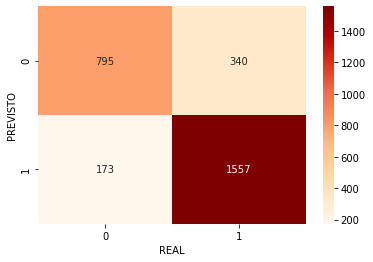

In [88]:
y_pred = modelo.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()